# Box Plots and Their Uses

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:
1. Summarise the history of the box plot and situations in which it is used.
2. Demonstrate the use of the box plot using data of your choosing.
3. Explain any relevant terminology such as the terms quartile and percentile.
4. Compare the box plot to alternatives.

# 1. History of the Box Plot and Situations in which it used

### 1.1 History of the Box Plot

<img src="https://www.opensciencedatacloud.org/static/dashboard/img/home/john-tukey-crop.jpg" alt="Drawing" style="width: 800px;"/>

The Box Plot was invented in 1970 by John W Tukey’s as part of his toolkit for exploratory data analysis. Tukey was an American statistician who also introduced the word software to describe programs on which electronic calculators ran and was the first to use the word bit as an abbreviation for binary digit. 

The Box Plot did not become widely known until formal publication in 1977, however, it has become one of the most frequently used statistical graphics and is one of the few plot types invented in the 20th century that has found widespread adoption.

*They are different, but not different enough to matter -- like the maple leaves off the tree in my yard, when all I want to do is rake them up.* Roald Hoffmann, 1981 Nobel Laureate in Chemistry from: The Same and Not the Same

As the quote above goes, Tukey's contribution was to think deeply about appropriate summary statistics that worked for a wide range of data and to connect those to the visual components of the range bar culminating in a succinct distributional summary. 

Today, what we call a boxplot is more closely related to what Tukey called a schematic plot; a box-and-whiskers plot. It consists of: 
1. A line (vertical or horizontal) extending from the minimum value to the maximum value. 
2. A box, the end lines of which depict the 25th percentile and the 75th percentile 
3. A central line within which depicts the median.
4. Outliers are plotted as individual data points.

As computers have become more prevalent and more powerful, it has become easier to produce compact summaries that display more data and thus the Box Plot has evolved and been adapted. Evolution the of Box Plot:
- 1950’s Spear basic graphic box plot with range bar
- 1970's Box Plot by American statistician John Wilder Tukey
- Variable-width and Notched Box Plots (McGill and Larsen, 1978)
- Rangefinder Plot (Becketti and Gould, 1987) mapped to 2D
- Vase Plot (Benjamini, 1988), depicting symmetrical display of estimated density rather than a box
- HDR Box Plot (Hyndman, 1996)
- Violin Plots (Hintze and Nelson, 1998) which are similar to Vase plots but display the density for all data points
- Robust Bivariate Boxplot (Zani et al., 1998), uses convex hull peeling to find the central regions
- Bagplot, (Rousseuw et al., 1999), also 2D
- Rotational Boxplot of Muth et al. (2000) used a circular approach
- Midgap Plot (Tufte, 2001) 
- Raindrop Plot (Barrowman and Myers, 2003)
- Box-percentile Plot (Esty and Banfield, 2003)
- Letter-value Box Plot (Hofmann et al., 2006) 
- Sectioned Density Plot (Cohen and Cohen, 2006)
- Bean Plot (Kampstra, 2008)
- Summary Plot (Potter et al., 2010) 
- Functional boxplots (Hyndman and Shang, 2010; Sun and Genton, 2011) take the ideas of 2d boxplots and extend them to the infinite-dimensional functional case

### 1.2 Situations in which it is used

<img src="https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3A76c695b74012b2ac940d6fe7e7d4d082ffa0e626210fa4ce8cdf548e%2BIMAGE%2BIMAGE.1" alt="Drawing" style="width: 500px;"/>

https://www.britannica.com/science/box-and-whisker-plot: The box-and-whisker plot is useful for revealing the central tendency and variability of a data set, the distribution (particularly symmetry or skewness) of the data, and the presence of outliers. It is also a powerful graphical technique for comparing samples from two or more different treatments or populations. 

Some Implementations of the Boxplot:
An increasing number of statistical software packages offer exploratory data displays and summaries. For one of these, the graphical technique known as the boxplot, a selective survey of popular software packages revealed several definitions. These alternative constructions arise from different choices in computing quartiles and the fences that determine whether an observation is “outside” and thus plotted individually. We examine these alternatives and their consequences, discuss related background for boxplots (such as the probability that a sample contains one or more outside observations and the average proportion of outside observations in a sample), and offer recommendations that lead to a single standard form of the boxplot.


The next step would be to observe simple descriptive statistics, for example by calculating the mean, standard deviation, range, etc. The command boxplot plots some of those values. 

http://www.physics.csbsju.edu/stats/box2.html
https://en.wikipedia.org/wiki/Five-number_summary

“A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum. The term “box plot” comes from the fact that the graph looks like a rectangle with lines extending from the top and bottom. Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.”
https://happygostacie.wordpress.com/2016/04/24/boxplot-fun-with-python/



The best tool to identify the outliers is the box plot.

fter you check the distribution of the data by plotting the histogram, the second thing to do is to look for outliers. Identifying the outliers is important because it might happen that an association you find in your analysis can be explained by the presence of outliers.

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm

A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set. Box and whisker plots are also very useful when large numbers of observations are involved and when two or more data sets are being compared. (See the section on five-number summaries for more information.)

Box and whisker plots are ideal for comparing distributions because the centre, spread and overall range are immediately apparent.

Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median f the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. 

whiskers, hinges and medians

# 2. Uses of the Box Plot Using the Iris Data Set

http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
https://plot.ly/matplotlib/box-plots/
https://stackoverflow.com/questions/44119653/creating-a-boxplot-with-matplotlib
https://matplotlib.org/gallery/statistics/boxplot_demo.html
https://matplotlib.org/examples/pylab_examples/boxplot_demo.html



http://alpha.imag.pub.ro/~rasche/course/patrec/patrec1.pdf: 

descriptive stats

Figure 11: Box plot for the four features (variables) of the
famous Iris flower data set. From center to outside: the
red marker denotes the median; the edges of the blue box
delineate the 25th and 75th percentile; the black markers
denote the range without outliers; red plus markers denote
points considered outliers. Matlab: boxplot. Python:
matplotlib.pyplot.boxplot.
Note that the ’spread’ of the data can be very different:
the 2nd and 3rd features have very different ranges. That
means we might night scaling, otherwise the petal length
(3rd feature) might dominate classification.

Feature Value Distribution To look at the data in more detail we could then employ histograms (Fig.
12). We return to that in the section of density estimation (Section 14). It also merits to check whether the
variables co-vary, but we elaborate on that later (Section 6.1).
Figure 12: Histograms for the four Iris features.
Matlab: hist. Python: matplotlib.pyplot.hist.
Note that the distributions look very different. Some
appear to be uni-modal (one peak) - the upper row;
some appear to be bi-modal (two peaks) - the lower
row; or they can be even multi-modal (lower right),
though that could also be a distribution with no
peaks at all.

#### What you might expect to find plotting a boxplot from the Iris Data Set: 
<img src="https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/07/boxplot_tableau.png" alt="Drawing" style="width: 500px;"/>

In [17]:
# Import numpy as np
import numpy as np

# import matplot
import matplotlib.pyplot as plt

#Use the 'inline' backend, so that the matplotlib graphs are included in notebook, next to the code
%matplotlib inline

# Import pandas
import pandas as pd

# import seaborn 
import seaborn as sns

In [18]:
# matplotlib.pyplot.boxplot

In [19]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [20]:
# check if the link works
# prints the first few rows of the iris data set
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


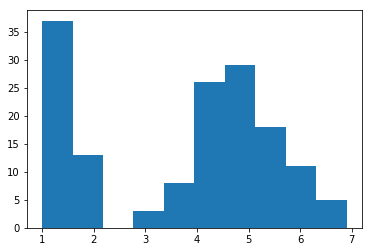

In [36]:
# plot a histogram
x = [df.petal_length] 
plt.hist(x)
plt.show()

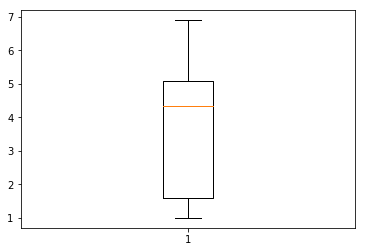

In [21]:
plt.boxplot(df.petal_length)
plt.show()

The mean is the arithmetic average of a set of numbers, or distribution.	

The median as shown in the yellow line above is described as the numeric value separating the higher half of a sample, a population, or a probability distribution, from the lower half.

In [22]:
# return means
mean = np.mean(df.petal_length)
mean

3.7586666666666693

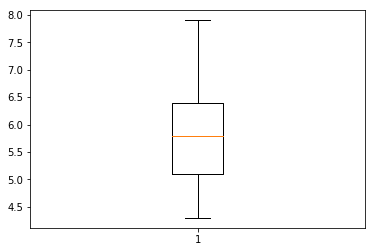

In [23]:
plt.boxplot(df.sepal_length)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,0,'')]

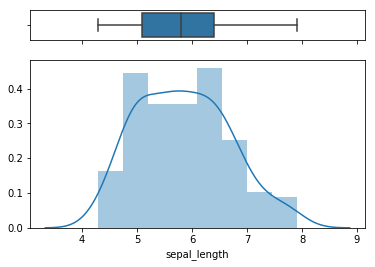

In [24]:
# https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


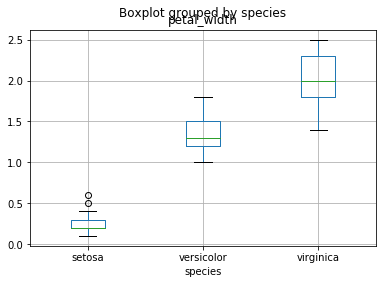

In [25]:
df.boxplot(column='petal_width', by='species')


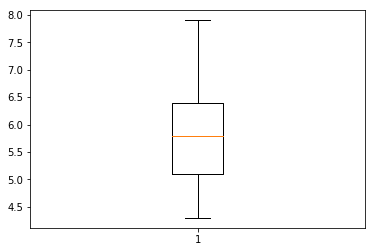

In [26]:
plt.boxplot(df["sepal_length"])
plt.show()

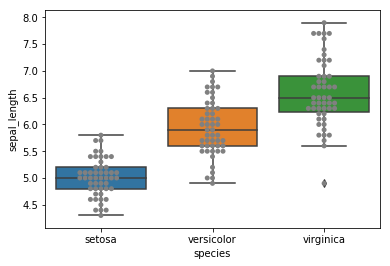

In [27]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=df)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='species', y='sepal_length', data=df, color="grey")

ax


In [28]:
# check the number of species to see how many box plots you would expect using species
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

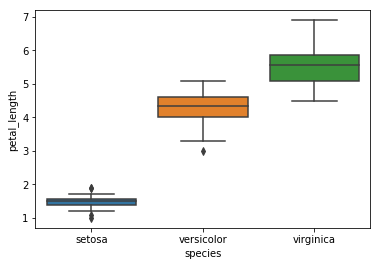

In [29]:
# To plot the species data using a box plot:

sns.boxplot(x="species", y="petal_length", data=df )
plt.show()



In [30]:
#get slice of data to use in boxplot
slice = df.iloc[:,[0, 4]]

In [31]:
slice.head()

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


TypeError: unsupported operand type(s) for /: 'str' and 'int'

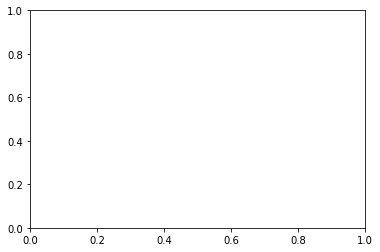

In [32]:
#gives individual boxplot with all step names
bp = df.boxplot(column='species', by='sepal_length')
axes = plt.gca()
axes.set_ylim([0,15])
plt.show()

In [ ]:
# Matplotlib boxplot
fig = plt.figure(1, figsize=figsize)
ax = fig.add_subplot(111)
bp = ax.boxplot(dataset)
plt_boxplot = plt.boxplot(dataset)
plt.title("plt_boxplot")  # plt.boxplot() doesn't support title as keywd arg
fig.savefig('plt_boxplot.png')
# plt.show()
assert not is_grid_on(ax)

In [ ]:
sns.boxplot(x="species", y="petal_width", data=df)
sns.boxplot(x="species", y="petal_length", data=df)

In [ ]:
# Draw a boxplot for each numeric variable in a DataFrame:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="v", palette="Set2")
ax = sns.swarmplot(data=iris, orient="v")

Plot X versus Y for the 4no. types of datasets. 
Also plot the linear regression for each dataset to make conclusions on the line of best fit versus the actual figures of the dataset

The dataset can also be loaded directly into Seaborn. Below are adjusted graphics / alternative representation of the datasets. 

In [ ]:
# Seaborn conveniently provides the data for Anscombe's quartet.
df = sns.load_dataset("anscombe")
dset = df.dataset.unique()

# Computing basic stats and linear regression all groups.
for data in dset:
    tmp = df.loc[df.dataset == data]


# Setting up params for graphic
sns.set(style="white")
sns.set_context("talk")
sns.despine(left=True)

# Plotting
catcher = sns.lmplot("x", "y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="husl", height=4,
           scatter_kws={"s": 50, "alpha": 0.7}, aspect=1.5)

sns.despine()

# Saving graphic
plt.savefig('quartet.png')

### Examining the Distribution

a. Minimum value →4

Q1→6

Median →9

Q3→10

Maximum value →12

The median of the data set is located to the right of the center of the box, which indicates that the distribution is negatively skewed.

b. Minimum value →225

Q1→250

Median →300

Q3→325

Maximum value →350

The median of the data set is located to the right of the center of the box, which indicates that the distribution is negatively skewed.

c. Minimum value →60

Q1→70

Median →75

Q3→95

Maximum value →100

The median of the data set is located to the left of the center of the box, which indicates that the distribution is positively skewed.

# 3. Terminology

<img style="float: center;" src="https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3Ac85d101d220100e34b569a895441f5c1ba672eea0d9f600e201d241c%2BIMAGE_TINY%2BIMAGE_TINY.1" alt="Drawing" style="width: 800px;"/>

<img style="float: left;" src="http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/resources/interpret_boxplots.png" alt="Drawing" style="width: 400px;"/>

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm: 
Carl's highest and lowest sales are both higher than Angela's corresponding sales, and Carl's median sales figure is higher than Angela's. Also, Carl's interquartile range is larger than Angela's.

These results suggest that Carl consistently sells more computers than Angela does.


There are several ways to describe the centre and spread of a distribution. One way to present this information is with a five-number summary. It uses the median as its centre value and gives a brief picture of the other important distribution values. Another measure of spread uses the mean and standard deviation to decipher the spread of data. This technique, however, is best used with symmetrical distributions with no outliers.

Despite this restriction, the mean and standard deviation measures are used more commonly than the five-number summary. The reason for this is that many natural phenomena can be approximately described by a normal distribution. And for normal distributions, the mean and standard deviation are the best measures of centre and spread respectively.

Standard deviation takes every value into account, has extremely useful properties when used with a normal distribution, and is mathematically manageable. But the standard deviation is not a good measure of spread in highly skewed distributions and, in these instances, should be supplemented by other measures such as the semi-quartile range.

The semi-quartile range is rarely used as a measure of spread, partly because it is not as manageable as others. Still, it is a useful statistic because it is less influenced by extreme values than the standard deviation, is less subject to sampling fluctuations in highly skewed distributions and  is limited to only two values Q1 and Q3. However, it cannot stand alone as a measure of spread.

## Five Number Summary:
Is a set of descriptive statistics that provide information about a dataset. It consists of the five most important sample percentiles:

a boxplot is a visual display of a five number summary

The box plot is defined by five data-summary values and also shows the outliers. 

## Minimum:
sample minimum
small observation

## First Quartile:
lower quartile

## Median:
middle value

Median and Box
The box portion of the box plot is defined by two lines at the 25th percentile and 75th percentile. The 25th
percentile is the value at which 25% of the data values are below this value. Thus, the middle 50% of the data
values fall between the 25th percentile and the 75th percentile. The distance between the upper (75th percentile) and
lower (25th percentile) lines of the box is called the inter-quartile range (IQR). IQR is a popular measure of
spread.
A line is drawn inside the box at the median (the 50th percentile). The median is a popular measure of the
variable’s location (center). 


## Third Quartile:
upper quartile

## Maximum:
sample maximum 
largest observation

## Interquartile Range

Boundaries using the Inter-Quartile Range (IQR)
This is the traditional method for determining the boundaries. In this method, the whisker boundary is found by
multiplying a value (usually 1.5) times the IQR, and then going out that distance from the edge of the box. The
whisker boundary is then brought back in to the first data value that is reached. In technical terms (for the upper
whisker boundary), it is the largest observation that is less than or equal to the upper edge of the box plus the
multiplier times IQR.
The severe outlier boundary is defined similarly, but the multiplier is larger (usually 3).

## Outlier

## Univariate: 
Refers to an expression, equation, function or polynomial of only one variable


that can be measured on an ordinal, interval or ratio scale

A box plot is constructed from a numeric variable. A second variable may be used to divide the first variable into
groups (e.g., age group or gender). In the two-factor procedure, a third variable may be used to divide the groups
into subgroups.

Whisker and Outlier Boundaries
A box plot whisker is a line that goes out from the box to the whisker boundaries. Often a crossbar line is drawn
at the whisker boundary. Points outside the whisker boundaries are considered outliers. An additional boundary is
sometimes used for severe outliers, although there is no line drawn at the severe outlier boundaries.
In NCSS there are two ways to define these boundaries. One way uses a multiplier of the inter-quartile range. The
other uses percentiles.

Boundaries using Percentiles
The whisker boundary may also be defined in terms of percentiles, similarly to the edges of the box. For example,
the two whisker boundaries might be the 10th percentile and 90th percentile (or 5th and 95th).
The severe outlier boundaries might be the 1st and 99th percentiles, for example.

The above model of a box-and-whisker plot shows 2 horizontal lines (the whiskers) that each contain 25% of the data and are of the same length. In addition, it shows that the median of the data set is in the middle of the box, which contains 50% of the data. The lengths of the whiskers and the location of the median with respect to the center of the box are used to describe the distribution of the data. It's important to note that this is just an example. Not all box-and-whisker plots have the median in the middle of the box and whiskers of the same size.

Information about the data set that can be determined from the box-and-whisker plot with respect to the location of the median includes the following:

a. If the median is located in the center or near the center of the box, the distribution is approximately symmetric.

b. If the median is located to the left of the center of the box, the distribution is positively skewed.

c. If the median is located to the right of the center of the box, the distribution is negatively skewed.

Information about the data set that can be determined from the box-and-whisker plot with respect to the length of the whiskers includes the following:

a. If the whiskers are the same or almost the same length, the distribution is approximately symmetric.

b. If the right whisker is longer than the left whisker, the distribution is positively skewed.

c. If the left whisker is longer than the right whisker, the distribution is negatively skewed.

The length of the whiskers also gives you information about how spread out the data is.

A box-and-whisker plot is often used when the number of data values is large. The center of the distribution, the nature of the distribution, and the range of the data are very obvious from the graph. The five-number summary divides the data into quarters by use of the medians of the upper and lower halves of the data. Many data sets contain values that are either extremely high values or extremely low values compared to the rest of the data values. These values are called outliers. There are several reasons why a data set may contain an outlier. Some of these are listed below:

The value may be the result of an error made in measurement or in observation. The researcher may have measured the variable incorrectly.
The value may simply be an error made by the researcher in recording the value. The value may have been written or typed incorrectly.
The value could be a result obtained from a subject not within the defined population. A researcher recording marks from a math 12 examination may have recorded a mark by a student in grade 11 who was taking math 12.
The value could be one that is legitimate but is extreme compared to the other values in the data set. (This rarely occurs, but it is a possibility.)
If an outlier is present because of an error in measurement, observation, or recording, then either the error should be corrected, or the outlier should be omitted from the data set. If the outlier is a legitimate value, then the statistician must make a decision as to whether or not to include it in the set of data values. There is no rule that tells you what to do with an outlier in this case.

One method for checking a data set for the presence of an outlier is to follow the procedure below:

Organize the given data set and determine the values of Q1 and Q3.
Calculate the difference between Q1 and Q3. This difference is called the interquartile range (IQR): IQR=Q3−Q1.
Multiply the difference by 1.5, subtract this result from Q1, and add it to Q3.
The results from Step 3 will be the range into which all values of the data set should fit. Any values that are below or above this range are considered outliers.

## have you forgotten anything????
box-and-whisker plot	A box-and-whisker plot is a graph based upon medians. It shows the minimum value, the lower median, the median, the upper median, and the maximum value of a data set. It is also known as a box plot.
five-number summary	The numbers needed to construct a box-and-whisker plot are called the five-number summary. The five-number summary are: the minimum value, Q1, the median, Q2, and the maximum value.
Extremes	The extremes are the maximum and minimum values in a data set.
five point summary	The numbers needed to construct a box-and-whisker plot are called the five-point-summary. The five points are the minimum, the lower median (Q1), the median, the upper median (Q3), and the maximum.
line of fit	A line of fit is a straight or continuously curved line representing the trend of changes in the comparison of two data sets (or one set of bivariate data).
Median	The median of a data set is the middle value of an organized data set.
observed data	Observed data are the values that result from computations performed on the input variable.
Outlier	In statistics, an outlier is a data value that is far from other data values.
Quartile	A quartile is each of four equal groups that a data set can be divided into.
skewed	As with the horizontal skewing of a histogram, stem plots with a obvious skew toward one end or the other tend to indicate an increased number of outliers either lesser than or greater than the mode.
statistical correlation	Statistical correlation is a representation of possible related changes in values between the two sets of data.
trends	Trends in data sets or samples are indicators found by reviewing the data from a general or overall standpoint
uniform	A uniform shaped histogram indicates data that is very consistent; the frequency of each class is very similar to that of the others.

• the median,
• two hinges, the upper and lower fourths (quartiles),
• the data values adjacent to the upper and lower fences, which lie 1.5 times the inter-fourth range from
the median,
• two whiskers that connect the hinges to the fences, and
• (potential) out-liers, individual points further away from the median than the extremes.

In [ ]:
# describe what is going on across all datasets for x and y
df.describe()

Each dataset has the same mean, median, standard deviation, and correlation coefficient between x and y.

# 4. Comparing the Box Plot to Other Plots

Note that boxplot hide the number of values existing behind the variable. Thus, it is highly advised to print the number of observation, add unique observation with jitter or use a violinplot if you have many observations.

The first variation to display a density estimate was the vase plot (Benjamini, 1988), where the box is
replaced with a symmetrical display of estimated density. Violin plots (Hintze and Nelson, 1998) are very
similar, but display the density for all data points, not just the middle half. The bean plot (Kampstra, 2008)
is a further enhancement that adds a rug that showing every value and a line that shows the mean. The
name is inspired by the appearance of the plot: the shape of the density looks like the outside of a bean pod, and the rug plot looks like the seeds within. Kampstra (2008) also suggests a way of comparing two
groups more easily: use the left and right sides of the bean to display different distributions. A related idea
is the raindrop plot (Barrowman and Myers, 2003), but its focus is on the display of error distributions from
complex models.
Figure 4: From left to right: box plot, vase plot, violin plot and bean plot. Within each plot, the distributions from left to
right are: standard normal (n), right-skewed (s), leptikurtic (k), and bimodal (mm).

In [ ]:
sns.violinplot(x="species", y="petal_width", data=df, size=6)

# The data set can also be loaded directly Load the example dataset for Anscombe's quartet for seaborn
df = sns.load_dataset("anscombe")

sns.set(style="whitegrid")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

https://www.forbes.com/sites/naomirobbins/2012/01/10/comparing-distributions-with-box-plots/

https://www.forbes.com/sites/naomirobbins/2012/01/10/comparing-distributions-with-box-plots/#351694062c2c

histogram, violin, density

The descriptive statistics of the variables in the dataset show that for any one of the four given datasets: 
- The x and y values as well as the models appear to be identical
- The mean of all x values is 9 
- The standard deviation of all x values is 3.316625
- The mean of all y values is 7.5
- The standard deviation of all y values is 2.03. 
- The correlation between x and y in all four pairs is 0.816 and the linaer regression equations are all y = 3 + 0.5x.

This would suggest that the sets are similar, however, when we examine the plots (as described in Section 2), we can see that the four plots of x and y are very different. 

Anscombe’s Quartet shows:
- The importance of data visualisation in data analysis. Without data visualization, statistics alone could be misleading. 
- How data visualisation can help up make initial judgements on relationships between variables before conducting statistic calculations
- The effect of outliers on statistical properties

Ancombe felt that a computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.
 


# References 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
***
https://en.wikipedia.org/wiki/Box_plot
***
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/boxplot.stats.html
***
https://www.tandfonline.com/doi/abs/10.1080/00031305.1989.10475612
***
http://vita.had.co.nz/papers/boxplots.pdf
***
https://matplotlib.org/gallery/statistics/boxplot_demo.html
***
https://matplotlib.org/examples/pylab_examples/boxplot_demo.html
***
http://www.physics.csbsju.edu/stats/box2.html
***
https://en.wikipedia.org/wiki/Five-number_summary
***
https://www.itl.nist.gov/div898/handbook/eda/section3/boxplot.htm
***
https://happygostacie.wordpress.com/2016/04/24/boxplot-fun-with-python/
***
https://digibio.blogspot.com/2016/09/box-plots-and-connect-by-median.html
***
https://www.kaggle.com/kmuvunyi/iris-data-visualization
***
http://python-graph-gallery.com/boxplot/
***
https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm

# End